In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split

# 1. Implementation and test of perceptron model

## Generate and visualize a database S such that

In [33]:
# loading the data
df = pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [34]:
#looking for null data
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [35]:
df.drop(axis=1,columns='Unnamed: 32',inplace=True)
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [36]:
# our target is diagnosis, so we divede our data in X,y X: input space , y is the target
X , y = df.iloc[:,2:],df.iloc[:,1]

/tmp/ipykernel_58837/1845359377.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:,'target'] = y


<Axes: xlabel='perimeter_worst', ylabel='area_worst'>

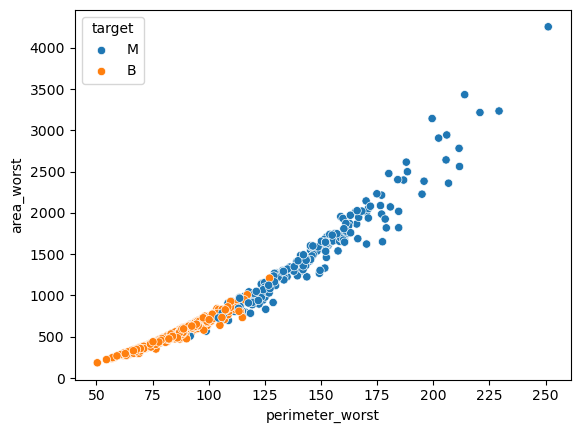

In [37]:
# getting the index of the two major mutual information between two features and the target
indices_maximos = np.argsort(mutual_info_classif(X,y))[-2:][::-1]
data = X.iloc[:,indices_maximos]
data.loc[:,'target'] = y
sb.scatterplot(data=data,x='perimeter_worst',y='area_worst',hue='target')

In [38]:
data.target.value_counts()

target
B    357
M    212
Name: count, dtype: int64

## Shuffle the dataset S and randomly subdivide it into disjoint sets Dtr and Dte for training and test, respectively. 
OBS: Verify if the classes $C_1$ and $C_2$ are balanced in $D_{tr}$ and $D_{te}$.

<Axes: xlabel='perimeter_worst', ylabel='area_worst'>

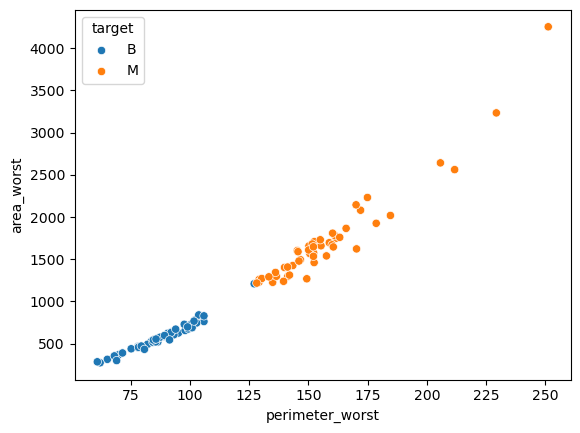

In [39]:
# filter and picking 50 samples for each label of the target 

data_filtrado_1 = data[data["perimeter_worst"] < 110].sample(n=50, random_state=2)  
data_filtrado_2 = data[data["area_worst"] > 1200].sample(n=50, random_state=2)  

# join the two filters
data_sample = pd.concat([data_filtrado_1, data_filtrado_2]).reset_index(drop=True)

sb.scatterplot(data=data_sample,x='perimeter_worst',y='area_worst',hue='target')

In [40]:
data_sample.target.value_counts()

target
B    50
M    50
Name: count, dtype: int64

In [41]:
X , y = data_sample.iloc[:,:-1], data_sample.iloc[:,-1]

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12,stratify=y)

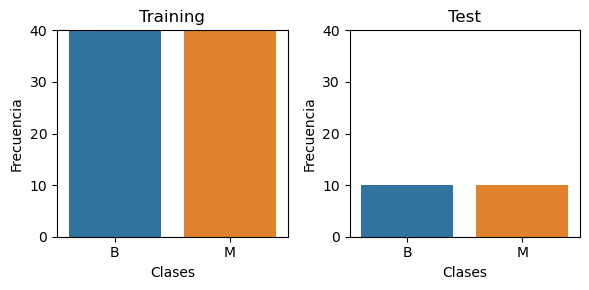

In [43]:
train_counts = y_train.value_counts()
test_counts = y_test.value_counts()

y_max = max(train_counts.max(), test_counts.max())
fig, axes = plt.subplots(1, 2, figsize=(6, 3))

# Plotting the value counts of y_train
sb.barplot(x=train_counts.index, y=train_counts.values, ax=axes[0],hue=train_counts.index)
axes[0].set_title("Training")
axes[0].set_xlabel("Clases")
axes[0].set_ylabel("Frecuencia")
axes[0].set_ylim(0, y_max)  

# Plotting the value counts of y_test
sb.barplot(x=test_counts.index, y=test_counts.values, ax=axes[1],hue=test_counts.index)
axes[1].set_title("Test")
axes[1].set_xlabel("Clases")
axes[1].set_ylabel("Frecuencia")
axes[1].set_ylim(0, y_max)  

plt.tight_layout()
plt.show()

In [44]:
y_train.loc[y_train=='M']=1.0
y_train.loc[y_train=='B']=0.0
y_test.loc[y_test=='M']=1.0
y_test.loc[y_test=='B']=0.0

In [45]:
y_train.value_counts()

target
0.0    40
1.0    40
Name: count, dtype: int64

In [46]:
y_test.value_counts()

target
0.0    10
1.0    10
Name: count, dtype: int64

In [58]:
X_train = np.array(X_train, dtype=np.float32)
X_test = np.array(X_test, dtype=np.float32)
y_train = np.array(y_train, dtype=np.float32)
y_test = np.array(y_test, dtype=np.float32)

In [51]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((80, 2), (20, 2), (80,), (20,))

## Implement the perceptron model (Figure 1) for classification in $\mathbb{R^2} × {+1, −1}$
perform training using the training set Dtr. Show some graphical configurations of the line that partitions
the pattern space together with the final solution.

In [14]:
from tensorflow import keras

2025-04-01 16:28:52.645906: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [15]:
from keras.layers import  Dense
from keras.models import Sequential
from keras.optimizers import Adam

In [56]:
# the percertron arquitecture 
model = Sequential()
model.add(Dense(1, input_shape=(2,), activation='sigmoid', kernel_initializer='glorot_uniform'))
model.compile(loss='MSE', optimizer=Adam(), metrics=['MSE'])

In [64]:
# training
history = model.fit(X_train, y_train.reshape(-1,1), epochs=100, batch_size=5, verbose=1, validation_split=0.2)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - MSE: 0.5428 - loss: 0.5428 - val_MSE: 0.5625 - val_loss: 0.5625
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - MSE: 0.5346 - loss: 0.5346 - val_MSE: 0.5625 - val_loss: 0.5625
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - MSE: 0.4839 - loss: 0.4839 - val_MSE: 0.5625 - val_loss: 0.5625
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - MSE: 0.4399 - loss: 0.4399 - val_MSE: 0.5625 - val_loss: 0.5625
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - MSE: 0.5260 - loss: 0.5260 - val_MSE: 0.5625 - val_loss: 0.5625
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - MSE: 0.4798 - loss: 0.4798 - val_MSE: 0.5625 - val_loss: 0.5625
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - MSE: 0.4707 - loss: 0.4707 - val_MSE: 0.5625 - val_loss: 0.5625
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - MSE: 0.5306 - loss: 0.5306 - val_MSE: 0.5625 - val_loss: 0.5625
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - MSE: 0.5508

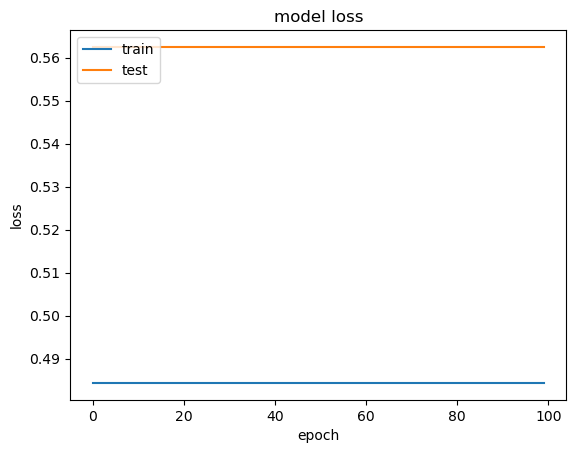

In [65]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()